<hr>
# Classification
<br>
<br>
<font size=5>In this case, the objective is to determinate if the variable belongs to one of several predefined classes or states. 
An very known example of this is the classification of iris flowers among three species (setosa, versicolor or virginica) using as features measurements of length and width of sepals and petals.</font>
<br>
<br>
<img src="pictures/iris.png" alt="drawing" width="800"/>
<br>
<br>
<font size=5> A calssification problem can be binary (two classes) or multi-class
<br>
<br>
<img src="pictures/binaryandnot.png" alt="drawing" width="600"/>
<br>
<br>
We will first focus on binary porblems and later we can expand this to multi-class porblems</font>

## Losgistic regression
<br>
<font size=5>We will start with a simple classification algortim called logistic regression. Trough it we will undrestand some characteristics and specificities of classification algorithms.
<br>
<br>
As ususal, we will undrestand this method using an example.
<br>
<br>
Imagine you have a group of mouses and want to determine wether they are obese or not using their weight. You may have data that looks like this:
<br>
<br>
<img src="pictures/logisticr1.jpg" alt="drawing" width="800"/>
<br>
<br>
In this case we will classify mouses in two classes: obese an not obese.  That means that our output variable is not a continuos value, but a discrete quantity that may take only two values: 0 or 1. 0 means the mouse is not obese, 1 means it is obese.
<br>
<br>
The first thing we coold do with this is to aproach these as a regression porblem and try to fit a linear model to the data. Something like this:
<br>
<br>
<img src="pictures/logisticr2.jpg" alt="drawing" width="800"/>
<br>
<br>    
 And to cope with the fact that the output is dicrete we could defien that:
<br>
<br>
if $y\geq 0.5$ then $y=1$
<br>
<br>
if $y < 0.5$ then $y=0$
<br>
<br>
An taht means taht we would have some sort of a threshold like this: 
<br>
<br>
<img src="pictures/logisticr3.jpg" alt="drawing" width="800"/>
<br>
<br>
And that result is probably not that bad.
<br>
<br>
How ever, it may have some porblems as we will se in the next example. Imagine we add an extra data point like this:
<br>
<br>
<img src="pictures/logisticr4.jpg" alt="drawing" width="800"/>
<br>
<br>    
That example shouldn´t change anything in terms of classification, but it can really damage our model:    
<br>
<br>
<img src="pictures/logisticr5.jpg" alt="drawing" width="800"/>
<br>
<br> 
The idea behind logistic regression is to change the model. We will not longer use a linear equation, but a losgistic or sigmoid equation.
<br>
<br>
$y(x)=g(\theta^Tx)$ 
<br>
<br>
$ g(z)= \frac{1} {1+e^{-z}}$
<br>
<br>
It looks like this:
<br>
<br>
<img src="pictures/logisticcurve.png" alt="drawing" width="500"/>
<br>
<br>
This is going ot behave much better than the linear equiation and you can see that the output is necesarely goning to be between 0 and 1.
<br>
<br>
## Interpretation of the output
<br>
<br>
A commo way to interpret the output of this kind of model is that the value of the output represents the probability that the sample has to belong to a specific class. That is: 
<br>
<br>
$p(y=1|x;\theta)$
<br>
<br>
And, given that is a binary problem:
<br>
<br>
$p(y=0|x;\theta)= 1-p(y=1|x;\theta)$
<br>
<br>
And we could choose the threshold that defines wether a point belongs to a class or not, depending on how sensitive to detecting an specific class  .
<br>
<br>
## Decision boundary
<br>
<br>
If we choose 0.5 as the threshold, we can see taht the output will be 1 if $g(z)>0.5$, that is if $z>0$ where $z=f(x)=\theta^Tx$. that means taht we have a desicion boundary in f(x)=0.
<br>
<br>
<img src="pictures/logisticcurve2.png" alt="drawing" width="500"/>
<br>
<br>
Now, let´s se how this looks if we have a calssification porblem with two input features. As an example we can imagine that we are going to calssify mouses in obese and not obese using their weight and size.
<br>
<br>
<img src="pictures/logisticr6.jpg" alt="drawing" width="800"/>
<br>
<br>
Notice that in this representation we are not considering the output as an axis. We are representing it by the symbol of echa point.
<br>
<br>
If in this case $z= f(x)=\theta^Tx=  \theta_0+ \theta_1x_1 + \theta_2x_2$ and our decision boundary isin: 
<br>
<br>
$z=f(x)=\theta_0+ \theta_1x_1 + \theta_2x_2=0$
<br>
<br>
In this plane, that equation correponds to a line, that can look something like this:
<br>
<br>
<img src="pictures/logisticr7.jpg" alt="drawing" width="800"/>
<br>
<br>
Here we can clearly see that we have a linear decision boundary.
<br>
<br>
## Cost function
Just as in linear regression, we can use gradiende descent to solve this porblem, but the cost funtion will have to change. In linear regression we used:
<br>
<br>
 $ J(\beta) = \frac{1}{m} \sum_{i=1}^m ( \frac{1}{2} (f(x^{(i)}) -y^{(i)})^2)$    
<br>
<br>
That is
<br>
<br>
 $ J(\beta) = \frac{1}{m} \sum_{i=1}^m (cost(f(x),y)$    
<br>
<br>
Now, we will change he "cost". The reason to change it is that if we use the same cost $J(\beta)$ is going to be a non convex function. So, to guarantee a convex funtion we will use the following.
<br>
<br>
$cost(f(x),y) = \begin{cases} -log(f(x)), & \mbox{if } y\mbox{ =1} \\ -log(1-f(x)), & \mbox{if } y\mbox{ =0} \end{cases}$

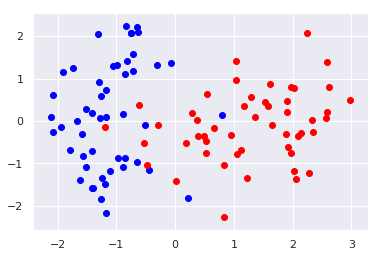

[[ 2.37873538 -0.22088688]]
[-0.08394175]


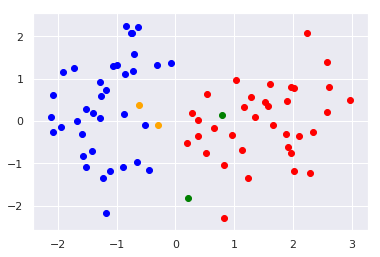

array([[36,  2],
       [ 2, 35]])

In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import pandas as pd


#create a data set
x, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

# plot data set
for i in range (0, 100):
    if y[i]==0:
        plt.scatter(x[i,0],x[i,1], color='blue')
    else:
         plt.scatter(x[i,0],x[i,1], color='red')

plt.show()            
            
 # split data set in train and test           
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#Create model
lr = LogisticRegression()

# Fit model
lr.fit(x_train, y_train)

#Print coeficients and intercept
print(lr.coef_)
print(lr.intercept_)

#Predict with train  data
y_pred = lr.predict(x_train)

# plot training data set
for i in range (0, 75):
    if y_train[i]==0:
        if y_pred[i]==0:
            plt.scatter(x_train[i,0],x_train[i,1], color='blue')
        else:
            plt.scatter(x_train[i,0],x_train[i,1], color='green')
    else:
        if y_pred[i]==1:
                plt.scatter(x_train[i,0],x_train[i,1], color='red')
        else:
            plt.scatter(x_train[i,0],x_train[i,1], color='orange')

plt.show() 

confusion_matrix(y_train, y_pred)

           

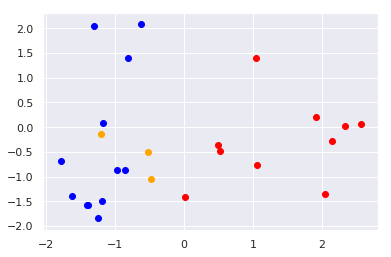

array([[12,  0],
       [ 3, 10]])

In [3]:
#Prediction with test data
y_pred = lr.predict(x_test)

# plot training data set
for i in range (0, 25):
    if y_test[i]==0:
        if y_pred[i]==0:
            plt.scatter(x_test[i,0],x_test[i,1], color='blue')
        else:
            plt.scatter(x_test[i,0],x_test[i,1], color='green')
    else:
        if y_pred[i]==1:
                plt.scatter(x_test[i,0],x_test[i,1], color='red')
        else:
            plt.scatter(x_test[i,0],x_test[i,1], color='orange')

plt.show() 

confusion_matrix(y_test, y_pred)


           

<hr>
# The confusion matrix
<br>
<br>
<font size=5>A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
<br>
<br>
Let's explain how it works.starting with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes)
<br>
<br>
Wi will make a matriz where de rows correspond to the predicted value and the columns correpond to the actual known values. Like this:
<br>
<br>
<img src="pictures/confusion-matrix.png" alt="drawing" width="800"/>
<br>
<br>
true positives (TP): These are cases in which we predicted 1, and the real value was 1.
true negatives (TN): We predicted 0, and the real value is 0.
false positives (FP): We predicted 1, and the real value is 0. (Also known as a "Type I error.")
false negatives (FN): We predicted 0, and the real value is 1.(Also known as a "Type II error.")
<br>
<br>
This is a good tool to compare different algorithms.
<br>
<br>

#  Sensitivity and Specificity
<br>
<br>
## Sensitivity
<br>
<br>
Sensitivity tell us the percentage of positive cases that were correcly calssified.
<br>
<br>
$Sensitivity=\frac{TP}{TP+FN}$
<br>
<br>
## Specificity
<br>
<br>
Sensitivity tell us the percentage of negative cases that were correcly calssified.
<br>
<br>
$Specificity=\frac{TN}{TN+FP}$
<br>
<br>
# Receiver operating characteristic (ROC) curve
<br>
<br>
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is constructedo ploting the false positive rate (1-specificity) vs the true positive rate (sensitivity) when we chanfe the threshold.
<br>
<br>
<img src="pictures/rocandaoc.png" alt="drawing" width="500"/>
<br>
<br>
Te area under this curve (AUC) is also an known parameter.


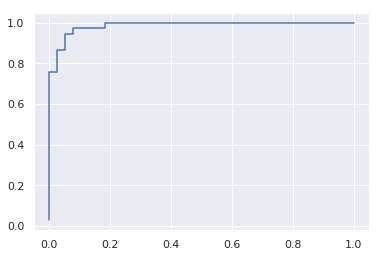

In [4]:
y_prob= lr.predict_proba(x_train)
fpr, tpr, thresholds=roc_curve(y_train, y_prob[:,1],pos_label=1)
plt.plot(fpr,tpr)
plt.show()

<hr>
# Linear discriminant analysis
<br>
<br>
<font size=5>The objective of LDA is to perform dimensionality reduction, while preserving as much of the class discriminatory information as possible. The way to do this is to project the data into a new axis. Let´s see it with an example.
<br>
<br>
<img src="pictures/lda1.jpg" alt="drawing" width="500"/>
<br>
<br>
<font size=5> We need to find an axis in wich to porject the data points like this:
<br>
<br>
<img src="pictures/lda2.jpg" alt="drawing" width="500"/>
<br>
<br>
The porjection would look like this:
<br>
<br>
<img src="pictures/lda3.jpg" alt="drawing" width="500"/>
<br>
<br>
And we can see taht, projected in this new axisit is not that diffciult to separate classes. But.. whic is going to be the crterion to chosse the axis?
<br>
<br>
We will look for an axis that maximizes the ditance betwen the means of each class and minimizes the sacatter within each class.
<br>
<br>
<img src="pictures/lda4.jpg" alt="drawing" width="700"/>
<br>
<br>
We must optimize both parameters. In the next picture we can se an example of what happens if we only maximize the ditance betwen means.
<br>
<br>
<img src="pictures/lda5.jpg" alt="drawing" width="800"/>
<br>
<br>
Now we need to see how this works if we have more than two features. Here is an example with three:
<br>
<br>
<img src="pictures/lda6.jpg" alt="drawing" width="500"/>
<br>
<br>
Essentially we do the ase thing: we look for a new axis to project the data.
<br>
<br>
<img src="pictures/lda7.jpg" alt="drawing" width="500"/>
<br>
<br>
And this axis minimizes scatter and maximizes distance between means.
<br>
<br>
<img src="pictures/lda8.jpg" alt="drawing" width="500"/>
<br>
<br>
Now we will see an example off how this works if we have more than two categories
<br>
<br>
<img src="pictures/lda9.jpg" alt="drawing" width="500"/>
<br>
<br>   
There are two main changes: the first one would be the way me measure the distance between means. in this case wi will find a central point and measure the ditance froma a mean to that point.
<br>
<br>
<img src="pictures/lda10.jpg" alt="drawing" width="500"/>
<br>
<br>
 The second difference will be that wi will have two new axis
 <br>
<br>
<img src="pictures/lda11.jpg" alt="drawing" width="500"/>
<br>
<br>
Now let´s see how LDA does in the same data set we just used to do lositic regression.

[[ 4.45200842 -0.77909001]]
[-0.61015282]


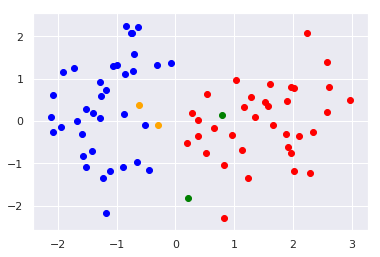

array([[36,  2],
       [ 2, 35]])

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




#Create model
ld = LinearDiscriminantAnalysis()

# Fit model
ld.fit(x_train, y_train)

#Print coeficients and intercept
print(ld.coef_)
print(ld.intercept_)

#Predict with train  data
y_pred = ld.predict(x_train)

# plot training data set
for i in range (0, 75):
    if y_train[i]==0:
        if y_pred[i]==0:
            plt.scatter(x_train[i,0],x_train[i,1], color='blue')
        else:
            plt.scatter(x_train[i,0],x_train[i,1], color='green')
    else:
        if y_pred[i]==1:
                plt.scatter(x_train[i,0],x_train[i,1], color='red')
        else:
            plt.scatter(x_train[i,0],x_train[i,1], color='orange')

plt.show() 

confusion_matrix(y_train, y_pred)

           

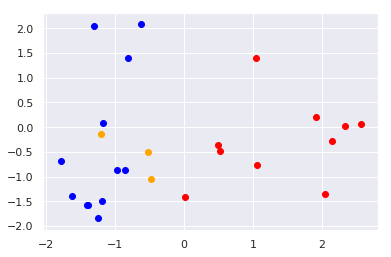

array([[12,  0],
       [ 3, 10]])

In [6]:

#Prediction with test data
y_pred = ld.predict(x_test)

# plot training data set
for i in range (0, 25):
    if y_test[i]==0:
        if y_pred[i]==0:
            plt.scatter(x_test[i,0],x_test[i,1], color='blue')
        else:
            plt.scatter(x_test[i,0],x_test[i,1], color='green')
    else:
        if y_pred[i]==1:
                plt.scatter(x_test[i,0],x_test[i,1], color='red')
        else:
            plt.scatter(x_test[i,0],x_test[i,1], color='orange')

plt.show() 

confusion_matrix(y_test, y_pred)

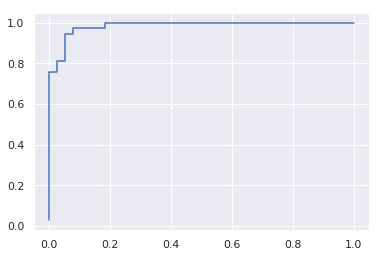

In [7]:
y_prob= ld.predict_proba(x_train)
fpr, tpr, thresholds=roc_curve(y_train, y_prob[:,1],pos_label=1)
plt.plot(fpr,tpr)
plt.show()

<hr>
# Clustering and classification
<br>
<br>
<font size=5>We have talked about classification. Now we are going to talk about clustering... And those are two terms taht can sometimes be confused with each other.
<br>
<br>
An important difference is that classification is a supervised learning task while clustering is unsupervised. That means taht in clustering we dont´t have labeled data!!
<br>
<br>
<img src="pictures/saulearning.png" alt="drawing" width="800"/>
<br>
<br>
To underestand a little bit this concept let´s se the followong data.
<br>
<br>
<img src="pictures/clusters.jpg" alt="drawing" width="800"/>
<br>
<br>   
Is there a pattern in this data?
<br>
<br>
As usual, to better undrestand what this is, we will study a simple method.
<br>
<br>
# K-means
<br>
<br>
 k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.
<br>
<br>
Let´s see an example:
<br>
<br>
<img src="pictures/km1.jpg" alt="drawing" width="800"/>
<br>
<br>
We can clearly see three separated groups. but.. ¿how can an lagorithm define this?
<br>
<br>
 We will begin by defining the number of clusters we want to identify and assign a random representative point for each cluster.
<br>
<br>
<img src="pictures/km2.jpg" alt="drawing" width="800"/>
<br>
<br> 
Then we calculate the distance between each point and the representative point of echa custer. The pomit is assigned to the cluster with a closer representative point.
   <br>
<br>
<img src="pictures/km3.jpg" alt="drawing" width="800"/>
<br>
<br>
And then we calculate the mena of each point and taht will be the new representative point. Then we repeat the procedure until thing don´t change in each iteration.
<br>
<br>
<img src="pictures/km11.jpg" alt="drawing" width="800"/>
<br>
<br>
    When we finish the result may not be the expected. An importatn fctor is to see the variation within the clusters.
<br>
<br>
<img src="pictures/km5.jpg" alt="drawing" width="800"/>
<br>
<br> 
And we can try again with new random starting points.
<br>
<br>
<img src="pictures/km6.jpg" alt="drawing" width="800"/>
<br>
<br>
Let´s see the variation this time.
<br>
<br>
<img src="pictures/km7.jpg" alt="drawing" width="800"/>
<br>
<br> 
This time the ressult is quite better.We can try several times and decide wich one is better.
<br>
<br>
<img src="pictures/km8.jpg" alt="drawing" width="800"/>
<br>
<br> 
But... what if we don´t know the aporpiated number of clusters????. we can also try different combinations.
<br>
<br>
<img src="pictures/km9.jpg" alt="drawing" width="800"/>
<br>
<br>
 We can make a plot like the following and we chose the "elbow point"
<br>
<br>
<img src="pictures/km10.jpg" alt="drawing" width="800"/>
<br>
<br> 
And.. what if we have more than one feature?
<br>
<br>
<img src="pictures/km12.jpg" alt="drawing" width="800"/>
<br>
<br> 
We do the same: chse random starting points taht represent each cluster
    <br>
<br>
<img src="pictures/km13.jpg" alt="drawing" width="800"/>
<br>
<br> 
And now we use the euclidean distance to derermine to wich cluster belongs eahc point.
<br>
<br>
<img src="pictures/km14.jpg" alt="drawing" width="800"/>
<br>
<br>
And we find the mean of each cluster.. and we repeat
<br>
<br>
<img src="pictures/km15.jpg" alt="drawing" width="800"/>
<br>
<br>   

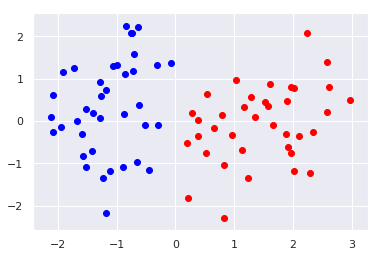

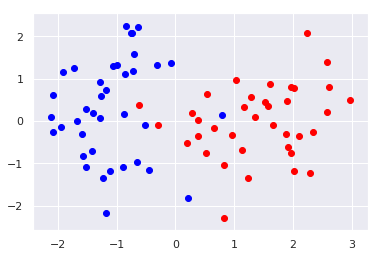

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
#Predict with train  data
y_pred = kmeans.labels_

# plot training data set
for i in range (0, 75):
    
    if y_pred[i]==0:
        plt.scatter(x_train[i,0],x_train[i,1], color='blue')
    else:
        plt.scatter(x_train[i,0],x_train[i,1], color='red')
   
plt.show() 
for i in range (0, 75):
    if y_train[i]==0:
        plt.scatter(x_train[i,0],x_train[i,1], color='blue')
    else:
        plt.scatter(x_train[i,0],x_train[i,1], color='red')

plt.show() 